# 公众号：菜J学Python  作者:J哥

# Seaborn

## 简介

### 定义

In [ ]:
'''
Seaborn是一个基于matplotlib且数据结构与pandas统一的统计图制作库。
Seaborn框架旨在以数据可视化为中心来挖掘与理解数据。
'''

### 优点

In [ ]:
'''
1.代码较少
2.图形美观
3.功能齐全
4.主流模块
'''

## 安装

### pip命令安装

In [ ]:
#pip install matplotlib
#pip install seaborn

### 从github安装

In [ ]:
#pip install git+https://github.com/mwaskom/seaborn.git

## 流程

### 导入绘图模块

In [ ]:
#mport matplotlib.pyplot as plt
#import seaborn as sns

### 提供显示条件

In [ ]:
#%matplotlib inline  #在Jupyter中正常显示图形

### 导入数据

In [ ]:
#Seaborn内置数据集导入
#dataset = sns.load_dataset('dataset')

#外置数据集导入（以csv格式为例）
#dataset = pd.read_csv('dataset') 

### 设置画布

In [ ]:
#设置一块大小为(12,6)的画布
#plt.figure(figsize=(12, 6))

### 输出图形

In [ ]:
#整体图形背景，共5种:"white", "dark", "whitegrid", "darkgrid", "ticks"
#sns.set_style('ticks')

#以条形图为例输出图形
#sns.barplot(x=x,y=y,data=dataset,...)

'''
barplot()括号里的是需要设置的具体参数，
涉及到数据、颜色、坐标轴、以及具体图形的一些控制变量，
基本的一些参数包括'x'、'y'、'data'，分别表示x轴，y轴，
以及选择的数据集。
'''

### 保存图形

In [ ]:
#将画布保存为保存为png、jpg、svg等格式图片
#plt.savefig('jg.png')

## 实战

In [153]:
#数据准备
df = pd.read_csv('./cook.csv') #读取数据集
df['难度'] = df['用料数'].apply(lambda x:'简单' if x<5 else('一般' if x<15 else '较难')) #增加分类字段
df = df[['菜谱','用料','用料数','难度','菜系','评分','用户']] #选择需要的列
df.sample(5)  #查看数据集的随机5行数据

,菜谱,用料,用料数,难度,菜系,评分,用户
2138,蛋白芝麻脆片,"蛋白,木糖醇,色拉油,盐,低筋面粉,芝麻",6,一般,清真菜,1.0,Better_J
619,牙签肉,"鸡胸肉,蚝油,烤肉酱,料酒,生抽,牙签,孜然粉,糖,生粉",9,一般,湘菜,4.7,暮之雪
1562,青椒炒香菇,"香菇,青椒,蒜",3,简单,鲁菜,4.7,小舞Dora
873,豉油烧鸡腿,"鸡腿,姜,葱,酿造酱油,黑胡椒",5,一般,粤菜,4.8,阿罗al
2111,香蕉蛋白奶昔,"香蕉,脱脂牛奶,香蕉奶昔粉,冰块,料理机",5,一般,清真菜,5.0,魏姓男子


In [157]:
#导入相关包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置加载的字体名
plt.rcParams['axes.unicode_minus'] = False   # 解决保存图像是负号'-'显示为方块的问题 
# sns.set_style('white')   #设置图形背景样式为white

### 直方图

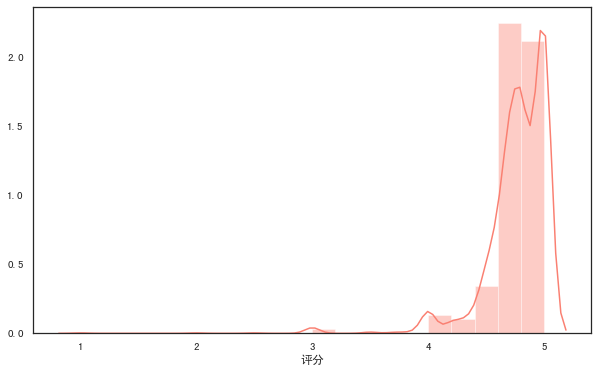

In [252]:
#语法
'''
seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, 
hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, 
vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
'''

#distplot()输出直方图，默认拟合出密度曲线
plt.figure(figsize=(10, 6)) #设置画布大小
rate = df['评分']
sns.distplot(rate,color="salmon",bins=20) #参数color样式为salmon，bins参数设定数据片段的数量

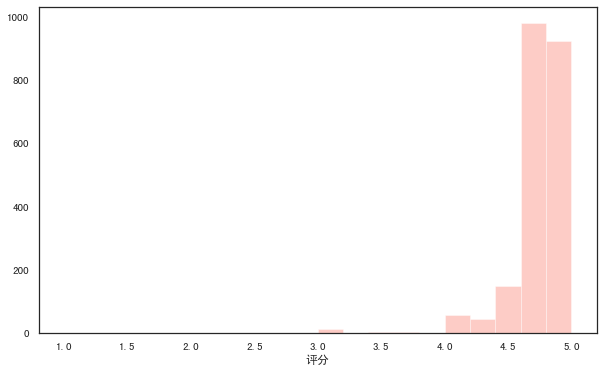

In [251]:
#kde参数设为False,可去掉拟合的密度曲线
plt.figure(figsize=(10, 6))
sns.distplot(rate,kde=False,color="salmon",bins=20)

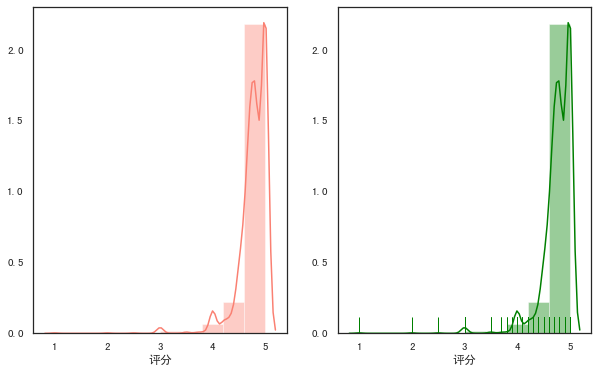

In [239]:
#设置rug参数，可添加观测数值的边际毛毯
fig,axes=plt.subplots(1,2,figsize=(10,6)) #为方便对比，创建一个1行2列的画布,figsize设置画布大小

sns.distplot(rate,color="salmon",bins=10,ax=axes[0]) #axes[0]表示第一张图(左图)

sns.distplot(rate,color="green",bins=10,rug=True,ax=axes[1]) #axes[1]表示第一张图(右图)

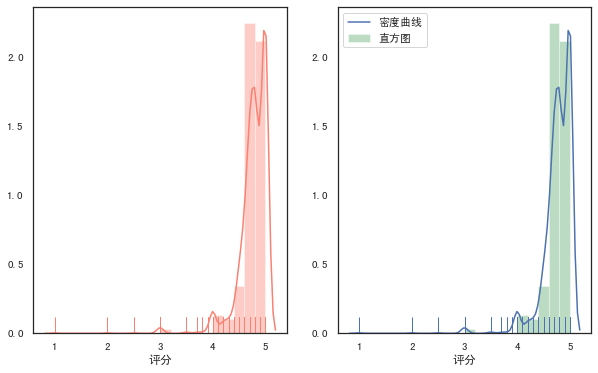

In [243]:
#多个参数可通过字典传递
fig,axes=plt.subplots(1,2,figsize=(10,6)) 
sns.distplot(rate,color="salmon",bins=20,rug=True,ax=axes[0])

sns.distplot(rate,rug=True,
                     hist_kws={'color':'g','label':'直方图'},
                     kde_kws={'color':'b','label':'密度曲线'},
                     bins=20,
                     ax=axes[1])

### 散点图

#### 常规散点图:scatterplot

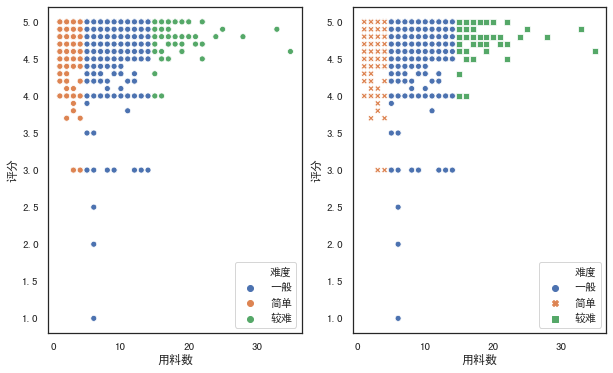

In [261]:
#语法
'''
seaborn.scatterplot(x=None, y=None, hue=None, style=None, size=None, 
data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, 
size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None,
y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha='auto', 
x_jitter=None, y_jitter=None, legend='brief', ax=None, **kwargs)
'''

fig,axes=plt.subplots(1,2,figsize=(10,6)) 
#hue参数，对数据进行细分
sns.scatterplot(x="用料数", y="评分",hue="难度",data=df,ax=axes[0])

#style参数通过不同的颜色和标记显示分组变量
sns.scatterplot(x="用料数", y="评分",hue="难度",style='难度',data=df,ax=axes[1])

#### 分簇散点图:stripplot

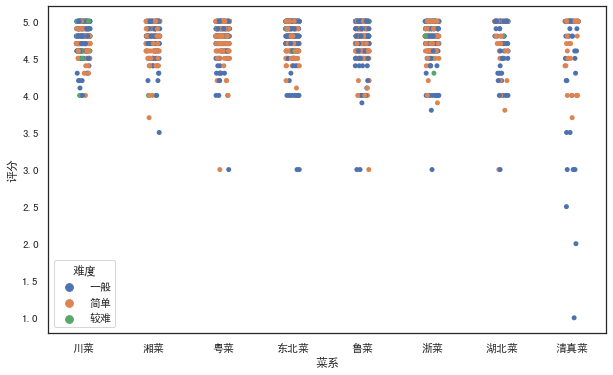

In [275]:
#语法
'''
seaborn.stripplot(x=None, y=None, hue=None, data=None, order=None, 
hue_order=None, jitter=True, dodge=False, orient=None, color=None, 
palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)
'''

#设置jitter参数控制抖动的大小
plt.figure(figsize=(10, 6))
sns.stripplot(x="菜系", y="评分",hue="难度",jitter=1,data=df)

#### 分类散点图:swarmplot

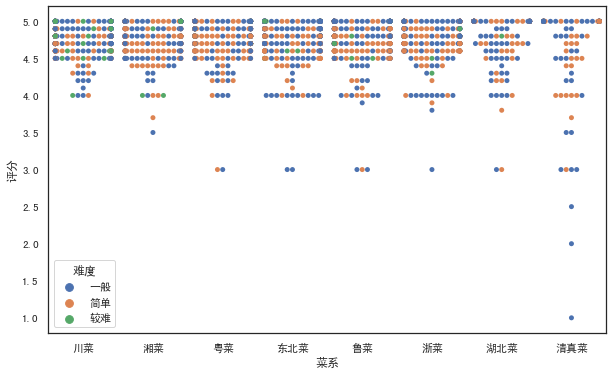

In [361]:
#绘制分类散点图(带分布属性)
#语法
'''
seaborn.swarmplot(x=None, y=None, hue=None, data=None, order=None,
hue_order=None, dodge=False, orient=None, color=None, palette=None, 
size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)
'''

plt.figure(figsize=(10, 6))
sns.swarmplot(x="菜系", y="评分",hue="难度",data=df)

### 条形图

#### 常规条形图:barplot

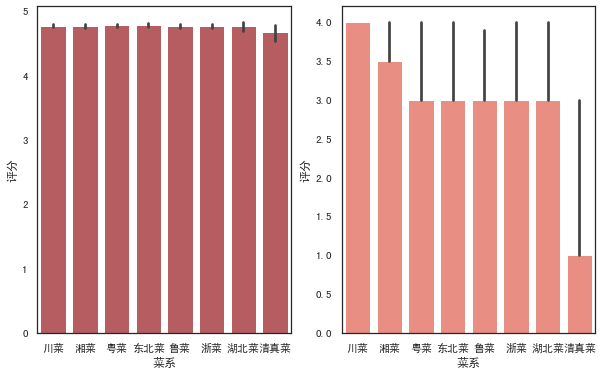

In [217]:
#语法
'''
seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, 
hue_order=None,ci=95, n_boot=1000, units=None, orient=None, color=None,
palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, 
ax=None, estimator=<function mean>，**kwargs)
'''

#barplot()默认展示的是某种变量分布的平均值（可通过修改estimator参数为max、min、median等）
# from numpy import median
fig,axes=plt.subplots(1,2,figsize=(10,6)) 
sns.barplot(x='菜系',y='评分',color="r",data=df,ax=axes[0])

sns.barplot(x='菜系',y='评分',color="salmon",data=df,estimator=min,ax=axes[1])

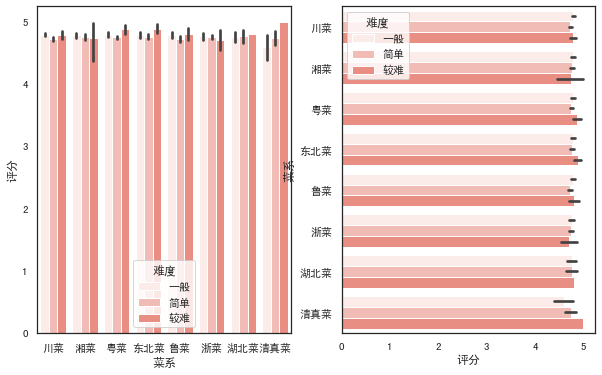

In [357]:
fig,axes=plt.subplots(1,2,figsize=(10,6))
#设置hue参数，对x轴的数据进行细分
sns.barplot(x='菜系',y='评分',color="salmon",hue='难度',data=df,ax=axes[0])
#调换x和y的顺序，可将纵向条形图转为水平条形图
sns.barplot(x='评分',y='菜系',color="salmon",hue='难度',data=df,ax=axes[1])

#### 计数条形图:countplot

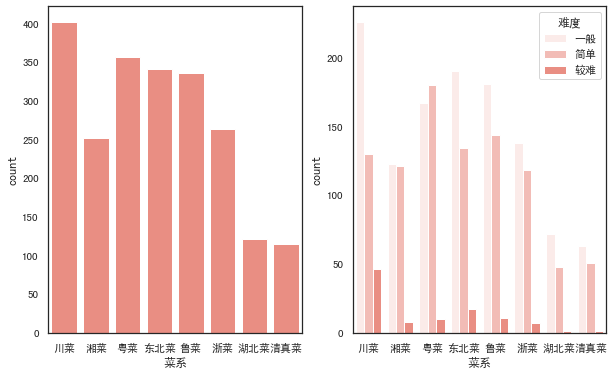

In [359]:
#语法
'''
seaborn.countplot(x=None, y=None, hue=None, data=None, order=None, 
hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
'''

fig,axes=plt.subplots(1,2,figsize=(10,6))
#选定某个字段，countplot()会自动统计该字段下各类别的数目
sns.countplot(x='菜系',color="salmon",data=df,ax=axes[0])
#同样可以加入hue参数
sns.countplot(x='菜系',color="salmon",hue='难度',data=df,ax=axes[1])

### 折线图

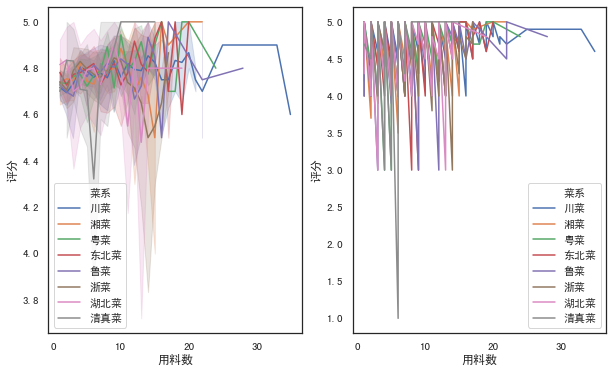

In [356]:
#语法
'''
seaborn.lineplot(x=None, y=None, hue=None, size=None, style=None, 
data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None,
size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean',
ci=95, n_boot=1000, sort=True, err_style='band', err_kws=None, legend='brief', ax=None, **kwargs)
'''

fig,axes=plt.subplots(1,2,figsize=(10,6)) 
#默认折线图有聚合
sns.lineplot(x="用料数", y="评分", hue="菜系",data=df,ax=axes[0]) 

#estimator参数设置为None可取消聚合
sns.lineplot(x="用料数", y="评分", hue="菜系",estimator=None,data=df,ax=axes[1]) 

### 饼图

#### 常规饼图

(-1.10795428153252, 1.112889383100508, -1.1030342626074106, 1.1178094020256175)

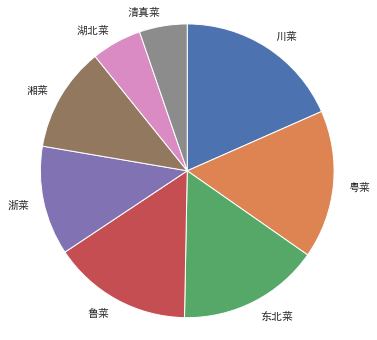

In [315]:
#语法
'''
pie(x,labels=None,explode=None,colors=None, autopct=None,
pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None,
radius=None, counterclock=True, wedgeprops=None, textprops=None,
center=(0, 0), frame=False, rotatelabels=False, hold=None, data=None)
'''

plt.figure(figsize=(10, 6))
sorted_counts = df['菜系'].value_counts()
plt.pie(x = sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False) #startangle=90和counterclock = False表示在垂直上方开始第一个扇区，然后按照顺时针方向有序地绘制每个扇区
plt.axis('square')   #axis函数将生成标准饼图

#### 环形图

(-1.10795428153252, 1.112889383100508, -1.1030342626074106, 1.1178094020256175)

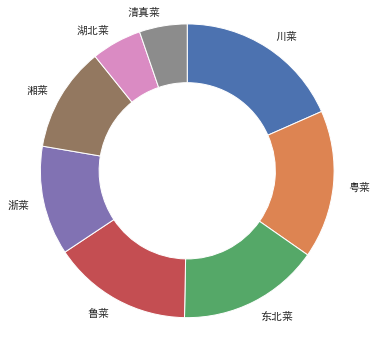

In [319]:
plt.figure(figsize=(10, 6))
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4}) #wedgeprops可设置环形宽度
plt.axis('square')

### 箱图

#### 箱线图:boxplot

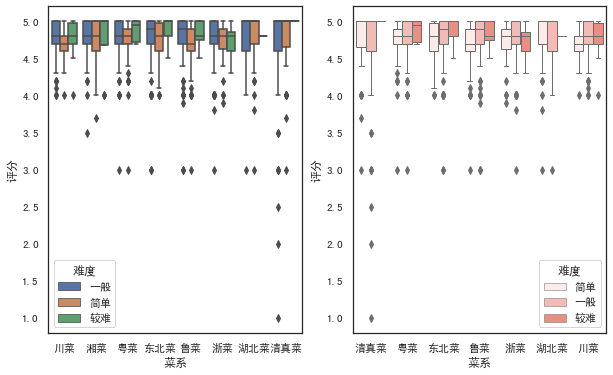

In [326]:
#语法
'''
seaborn.boxplot(x=None, y=None, hue=None, data=None, order=None, 
hue_order=None, orient=None, color=None, palette=None, saturation=0.75, 
width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)
'''
fig,axes=plt.subplots(1,2,figsize=(10,6)) 
sns.boxplot(x='菜系',y='评分',hue='难度',data=df,ax=axes[0])

#调节order和hue_order参数，可以控制x轴展示的顺序,linewidth调节线宽
sns.boxplot(x='菜系',y='评分',hue='难度',data=df,color="salmon",linewidth=1,
                    order=['清真菜','粤菜','东北菜','鲁菜','浙菜','湖北菜','川菜'],
                    hue_order=['简单','一般','较难'],ax=axes[1])


#### 箱型图:boxenplot

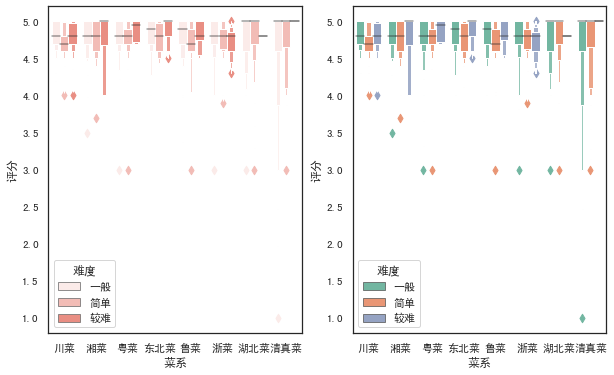

In [335]:
#语法
'''
seaborn.boxenplot(x=None, y=None, hue=None, data=None, order=None,
hue_order=None, orient=None, color=None, palette=None, saturation=0.75,
width=0.8, dodge=True, k_depth='proportion', linewidth=None, scale='exponential',
outlier_prop=None, ax=None, **kwargs)
'''

fig,axes=plt.subplots(1,2,figsize=(10,6)) 
sns.boxenplot(x='菜系',y='评分',hue='难度',data=df,color="salmon",ax=axes[0])

#palette参数可设置调色板
sns.boxenplot(x='菜系',y='评分',hue='难度',data=df, palette="Set2",ax=axes[1])

### 小提琴图

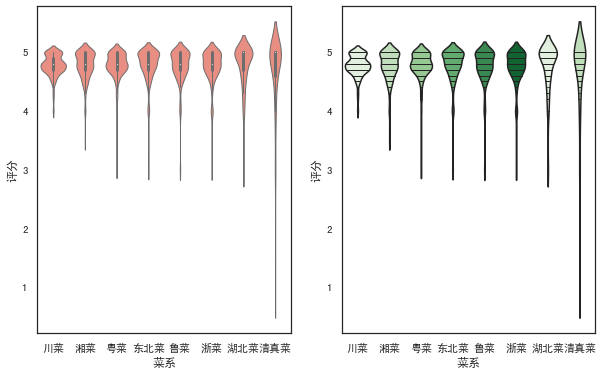

In [391]:
#语法
'''
seaborn.violinplot(x=None, y=None, hue=None, data=None, order=None, 
hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, 
gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None,
linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)
'''

fig,axes=plt.subplots(1,2,figsize=(10,6)) 
sns.violinplot(x='菜系',y='评分',data=df, color="salmon",linewidth=1,ax=axes[0])

#inner参数可在小提琴内部添加图形,palette设置颜色渐变
sns.violinplot(x='菜系',y='评分',data=df,palette=sns.color_palette('Greens'),inner='stick',ax=axes[1])

### 回归图

#### regplot

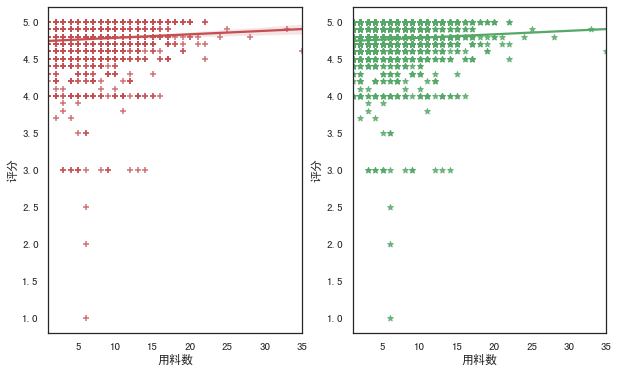

In [365]:
'''
seaborn.regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci',
                scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, 
                order=1, logistic=False, lowess=False, robust=False, logx=False, 
                x_partial=None, y_partial=None, truncate=False, dropna=True, 
                x_jitter=None, y_jitter=None, label=None, color=None, marker='o',
                scatter_kws=None, line_kws=None, ax=None)
'''

fig,axes=plt.subplots(1,2,figsize=(10,6)) 
#marker参数可设置数据点的形状
sns.regplot(x='用料数',y='评分',data=df,color='r',marker='+',ax=axes[0])
#ci参数设置为None可去除直线附近阴影(置信区间)
sns.regplot(x='用料数',y='评分',data=df,ci=None,color='g',marker='*',ax=axes[1])

#### lmplot

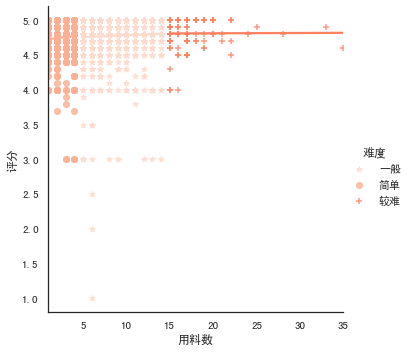

In [389]:
#语法
'''
seaborn.lmplot(x, y, data, hue=None, col=None, row=None, palette=None, 
               col_wrap=None, height=5, aspect=1, markers='o', sharex=True,
               sharey=True, hue_order=None, col_order=None, row_order=None, 
               legend=True, legend_out=True, x_estimator=None, x_bins=None,
               x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, 
               units=None, order=1, logistic=False, lowess=False, robust=False,
               logx=False, x_partial=None, y_partial=None, truncate=False, 
               x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, size=None)
'''

#lmplot()可以设置hue,进行多个类别的显示,而regplot()是不支持的
sns.lmplot(x='用料数',y='评分',hue='难度',data=df,
           palette=sns.color_palette('Reds'),ci=None,markers=['*','o','+'])


### 热力图

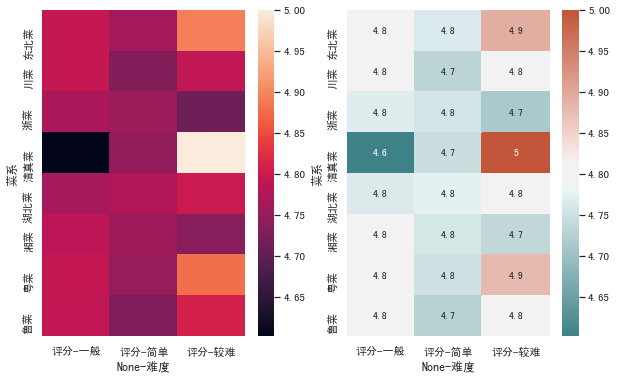

In [414]:
#语法
'''
seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, 
                robust=False, annot=None, fmt='.2g', annot_kws=None,
                linewidths=0, linecolor='white', cbar=True, cbar_kws=None, 
                cbar_ax=None, square=False, xticklabels='auto', 
                yticklabels='auto', mask=None, ax=None, **kwargs)
'''

fig,axes=plt.subplots(1,2,figsize=(10,6)) 
h=pd.pivot_table(df,index=['菜系'],columns=['难度'],values=['评分'],aggfunc=np.mean)
sns.heatmap(h,ax=axes[0])

#annot参数设置为True可显示数字,cmap参数可设置热力图调色板
cmap = sns.diverging_palette(200,20,sep=20,as_cmap=True)
sns.heatmap(h,annot=True,cmap=cmap,ax=axes[1])
#保存图形
plt.savefig('jg.png')